<a href="https://colab.research.google.com/github/lclarete/DHUM72500-FINAL-PORTFOLIO/blob/main/Clarete_Week14_topic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My reflection about this notebook: 

This was not an assignment, but rather a notebook where supervised classification was performed using sklearn models, such as SVC and LinearSVC. The data was imported using Pandas, and exploratory data analysis was conducted using bar charts. NaN values were dropped, and a train-test split was performed before applying TF-IDF. The models were trained, and the y variable was predicted, followed by evaluation using accuracy score, precision, and recall. Cross-validation was performed using the cross_val_score function, and the hyperparameters were tuned using Grid Search.
From a feminist perspective, the reflection involved the data collection process, which plays a crucial role in the overall data process and analysis pipeline. High-quality data is essential for conducting quality analysis and should be collected in an unbiased, diverse, and representative manner to ensure integrity and reliability. Addressing potential biases and social inequalities within the Java workplace requires evaluating the model's impact and considering any issues that may arise from insufficient training. Ethical considerations come into play when assessing the implications of using classification models and weighing them against potential harms, with a focus on enhancing user and employee experiences. To enhance efficiency, the selection of the most effective model is paramount, and while energy consumption may be challenging to measure accurately, time processing can serve as an evaluation metric. By conducting an initial analysis using a sample dataset, practitioners can assess the cost-benefit ratio and subsequently employ the optimized model for a full analysis. Additionally, creating Key Performance Indicators (KPI) efficiency metrics can aid both practitioners and academics in utilizing language models more effectively.


# Topic models with Gensim

Gensim is a popular library for topic modeling. Here we'll see how it stacks up to scikit-learn.

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data
!pip install pyLDAvis==2.1.2

--2023-05-25 07:44:19--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6483086 (6.2M) [text/csv]
Saving to: ‘data/recipes.csv’

recipes.csv         100%[===================>]   6.18M  41.0MB/s    in 0.2s    

2023-05-25 07:44:19 (41.0 MB/s) - ‘data/recipes.csv’ saved [6483086/6483086]

--2023-05-25 07:44:19--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10501219 (10M) [text/csv]
Saving to: ‘data/state-of-the-union

## Gensim vs. Scikit-learn

[Gensim](https://radimrehurek.com/gensim/) is a very very popular piece of software to do topic modeling with (as is [Mallet](http://mallet.cs.umass.edu/topics.php), if you're making a list). Since we're using scikit-learn for everything else, though, we use scikit-learn instead of Gensim when we get to topic modeling.

Since someone might show up one day offering us tens of thousands of dollars to demonstrate proficiency in Gensim, though, we might as well see how it works as compared to scikit-learn.

## Our data

We'll be using the same dataset as we did [with scikit-learn](/text-analysis/introduction-to-topic-modeling/#Attempt-two:-State-of-the-Union-addresses): State of the Union addresses from 1790 to 2012, where America's president addresses the Congress about the coming year.

In [ ]:
import pandas as pd

df = pd.read_csv("data/state-of-the-union.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")

df.head()

<ipython-input-2-4699dee7d493>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


## Using Gensim

In [ ]:
#!pip install --upgrade gensim

In [ ]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [ ]:
lsi_model.print_topics()

[(0,
  '0.084*"tonight" + 0.073*"program" + 0.066*"ve" + 0.065*"help" + 0.065*"budget" + 0.065*"mexico" + 0.065*"americans" + 0.061*"programs" + 0.059*"jobs" + 0.058*"re"'),
 (1,
  '-0.206*"tonight" + -0.169*"ve" + -0.137*"re" + -0.136*"jobs" + -0.130*"americans" + -0.124*"budget" + -0.123*"help" + -0.116*"programs" + -0.112*"program" + -0.106*"billion"'),
 (2,
  '0.199*"tonight" + 0.177*"ve" + 0.163*"re" + -0.137*"program" + 0.094*"jobs" + 0.092*"ll" + -0.092*"farm" + 0.091*"iraq" + -0.087*"veterans" + -0.081*"interstate"'),
 (3,
  '0.142*"program" + -0.120*"silver" + -0.114*"re" + -0.110*"cent" + 0.105*"communist" + -0.104*"ve" + -0.099*"tonight" + 0.097*"soviet" + 0.096*"programs" + -0.089*"gold"'),
 (4,
  '-0.198*"iraq" + -0.172*"terrorists" + 0.143*"silver" + 0.133*"gold" + -0.124*"interstate" + -0.118*"iraqi" + 0.111*"programs" + -0.110*"al" + 0.100*"mexico" + 0.099*"notes"'),
 (5,
  '0.272*"iraq" + 0.237*"terrorists" + -0.186*"re" + -0.186*"ve" + 0.168*"iraqi" + 0.151*"al" + 0.1

Gensim is all about how important each word is to the category. Why not visualize it? First we'll make a dataframe that shows each topic, its top five words, and its values.

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.083988,tonight,0
1,0.073465,program,0
2,0.065702,ve,0
3,0.065223,help,0
4,0.065036,budget,0


Then we'll use seaborn to visualize it.

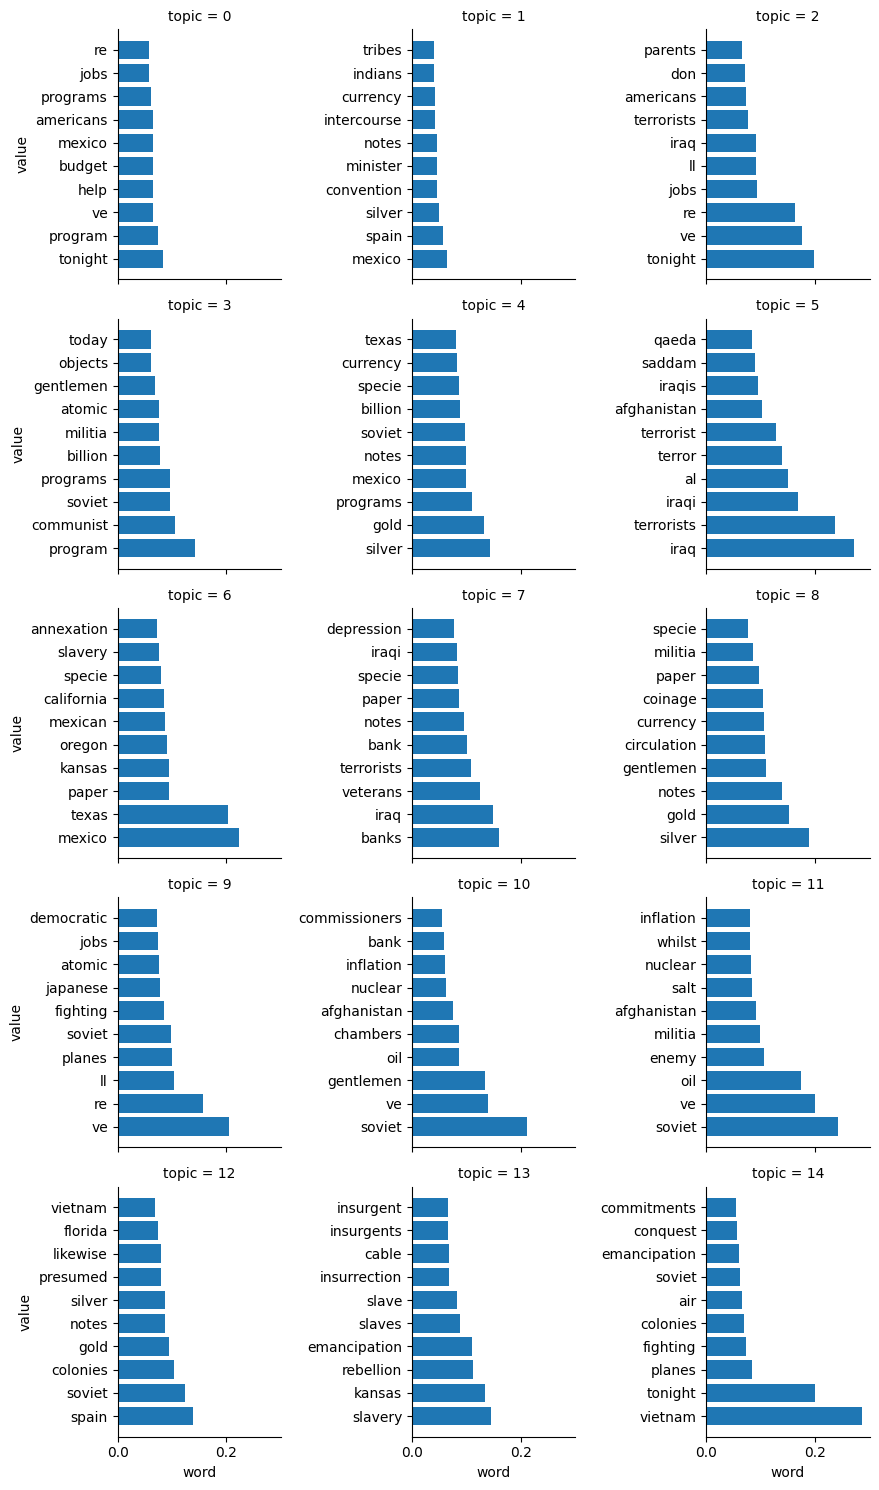

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

## Using LDA with Gensim

Now we'll use LDA.

In [ ]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [ ]:
lda_model.print_topics()

[(0,
  '0.003*"1559" + 0.003*"1930" + 0.003*"1626" + 0.003*"151" + 0.003*"1260" + 0.002*"1446" + 0.002*"1986" + 0.002*"440" + 0.002*"1971" + 0.002*"973"'),
 (1,
  '0.007*"1559" + 0.003*"151" + 0.003*"1619" + 0.003*"951" + 0.002*"1242" + 0.002*"1986" + 0.002*"1626" + 0.002*"440" + 0.002*"1784" + 0.002*"21"'),
 (2,
  '0.003*"1559" + 0.003*"1986" + 0.003*"1260" + 0.003*"1971" + 0.003*"976" + 0.002*"1930" + 0.002*"1626" + 0.002*"440" + 0.002*"1999" + 0.002*"1784"'),
 (3,
  '0.005*"1260" + 0.005*"1930" + 0.005*"1999" + 0.004*"1971" + 0.004*"1986" + 0.003*"1242" + 0.003*"1989" + 0.002*"1964" + 0.002*"1974" + 0.002*"1545"'),
 (4,
  '0.004*"1559" + 0.003*"151" + 0.003*"951" + 0.003*"1626" + 0.003*"976" + 0.002*"1260" + 0.002*"1446" + 0.002*"62" + 0.002*"440" + 0.002*"578"'),
 (5,
  '0.004*"1986" + 0.003*"1242" + 0.003*"1260" + 0.002*"1327" + 0.002*"1974" + 0.002*"1626" + 0.002*"1964" + 0.002*"1989" + 0.002*"1995" + 0.002*"1971"'),
 (6,
  '0.003*"1559" + 0.003*"951" + 0.003*"1327" + 0.002*"266"

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.014683  0.001307       1        1  15.110039
1     -0.012740  0.000462       2        1  15.060370
12     0.020872  0.000794       3        1  14.901245
14     0.018093 -0.000939       4        1  10.873596
8     -0.010554  0.000983       5        1   8.101820
10    -0.009801 -0.002639       6        1   8.001072
4     -0.007838  0.000695       7        1   7.029461
13    -0.006894  0.001599       8        1   6.195872
11    -0.004419 -0.005127       9        1   5.677571
7      0.007585 -0.003960      10        1   3.807234
5      0.002232 -0.003066      11        1   1.781337
0      0.000387  0.002417      12        1   1.724170
3      0.010536  0.001917      13        1   1.002143
9      0.004833  0.002571      14        1   0.509366
2      0.002392  0.002984      15        1   0.224704, topic_info=            Term        Freq       Total Category  logprob  loglift
1930        help  732.000000  732.000000  Default  30.0000  30.0000
1260   americans  742.000000  742.000000  Default  29.0000  29.0000
1986     program  688.000000  688.000000  Default  28.0000  28.0000
1971      budget  525.000000  525.000000  Default  27.0000  27.0000
1999     tonight  430.000000  430.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1974     billion    0.994542  437.273468  Topic15  -6.3803   0.0121
1964       today    0.976838  454.550694  Topic15  -6.3983  -0.0446
1446      tariff    0.933967  420.784883  Topic15  -6.4432  -0.0123
151   convention    0.971779  572.078800  Topic15  -6.4035  -0.2798
1995        jobs    0.921240  419.383643  Topic15  -6.4569  -0.0227

[1018 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1382      1  0.146932  accepted
1382      2  0.114990  accepted
1382      3  0.121379  accepted
1382      4  0.095825  accepted
1382      5  0.140544  accepted
...     ...       ...       ...
1896     11  0.015781   working
1896     12  0.018411   working
1896     13  0.013151   working
1896     14  0.005260   working
1896     15  0.002630   working

[7427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 13, 15, 9, 11, 5, 14, 12, 8, 6, 1, 4, 10, 3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
